# In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets

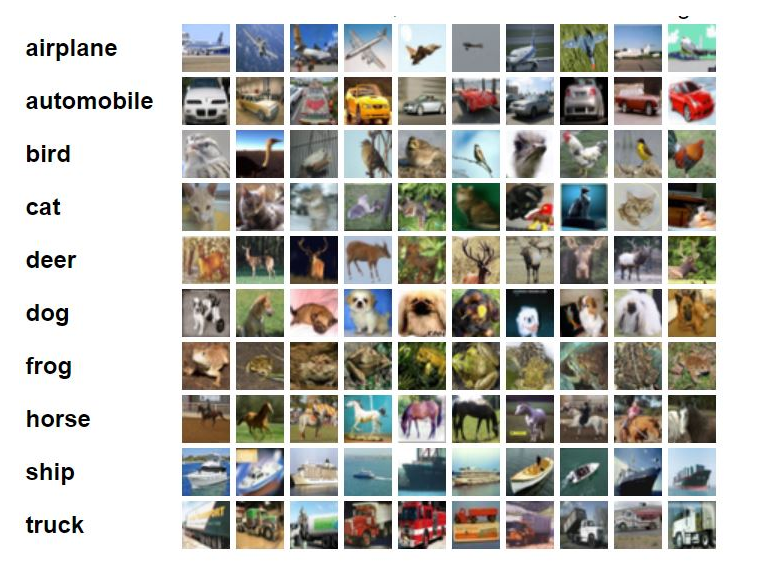

In [140]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report



In [141]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [142]:
# Analyzing shapes.
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [143]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [144]:
# Viewing training data points
y_train[:5] # as it is in 2D i am going to convert it in 1D


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [145]:
y_train = y_train.reshape(-1,) # in reshape function -1 means to keep first dimension same and after , means to flatten 2nd dimension 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [146]:
# Classes of Cifar10 DataSet
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse","ship", "truck"]

In [147]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

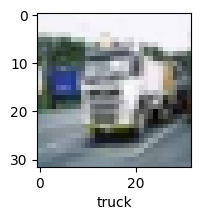

In [148]:
plot_sample(X_train, y_train,1000)

**Normalizing Data (0 -1 range for better computations)**

---









In [149]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [150]:
# as the pixels values are between 0 - 255, i am going to divide data with 255
X_train = X_train / 255
X_test =  X_test / 255


**Implementing CNN**

In [151]:
# For reproducibility setting seed values.
# Set the seed for NumPy random number generator
np.random.seed(42)

# Set the seed for TensorFlow random number generator
tf.random.set_seed(42)

In [152]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [153]:
# Train your model and obtain the training history
#history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
def learning_curve(history):
  
    # Access the loss and accuracy values from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the learning curve for loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the learning curve for accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()


In [154]:
from tensorflow import keras

In [155]:
#Setting learning rates (lr=0.1, lr=0.01, lr = 0.001, lr = 0.0001)
optm = tf.keras.optimizers.Adam(learning_rate=0.001)

In [156]:
cnn.compile(
    optimizer=optm,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [157]:
history = cnn.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4511 - accuracy: 0.4791 - val_loss: 1.1747 - val_accuracy: 0.5887
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1061 - accuracy: 0.6120 - val_loss: 1.0667 - val_accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9855 - accuracy: 0.6553 - val_loss: 0.9777 - val_accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9062 - accuracy: 0.6860 - val_loss: 0.9824 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8450 - accuracy: 0.7071 - val_loss: 0.9436 - val_accuracy: 0.6788
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7909 - accuracy: 0.7251 - val_loss: 0.9425 - val_accuracy: 0.6841
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7439 - accuracy: 0.7417 - val_loss: 0.9553 - val_accuracy

In [158]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9251 - accuracy: 0.7006


[0.9250754714012146, 0.7006000280380249]

In [159]:
# Converting y_test into 1D
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

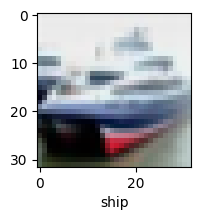

In [160]:
plot_sample(X_test, y_test, 1)

In [161]:
# Time for predictions
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [162]:
y_pred[:1]

array([[2.2001132e-04, 8.3048581e-06, 1.0454834e-02, 5.9527683e-01,
        1.6963996e-03, 3.8406372e-01, 7.9541951e-03, 9.5705818e-06,
        3.1385175e-04, 2.2762799e-06]], dtype=float32)

In [163]:
# To find max element we'll use argmax function
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [164]:
# now we can compare the above 5 prediction by model with actual data
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

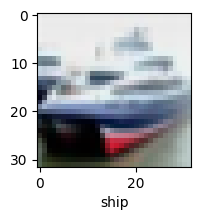

In [165]:
plot_sample(X_test, y_test, 1)

In [166]:
classes[y_classes[1]]

'ship'

In [167]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.81      0.82      0.81      1000
           2       0.52      0.65      0.58      1000
           3       0.54      0.49      0.51      1000
           4       0.68      0.60      0.64      1000
           5       0.65      0.58      0.61      1000
           6       0.80      0.74      0.77      1000
           7       0.69      0.81      0.74      1000
           8       0.87      0.78      0.82      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



#**Developing confusion matrix for better understanding**

In [168]:
import seaborn as sns

In [169]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

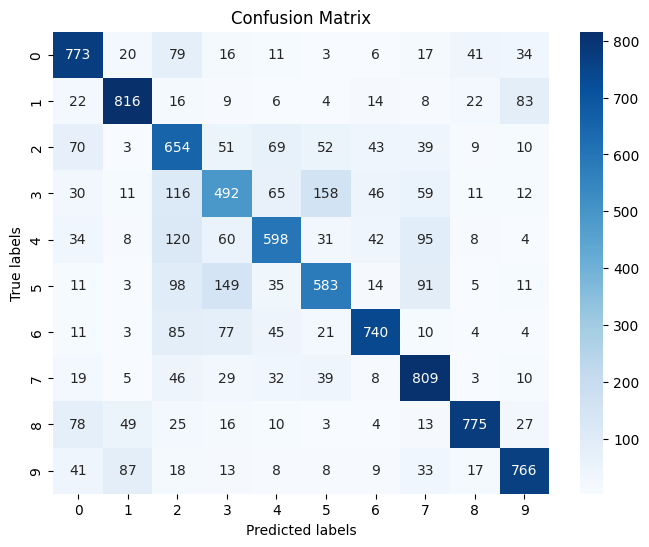

In [170]:
# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

# Convert the tensor to a NumPy array
confusion_matrix = confusion_matrix.numpy()

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [171]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

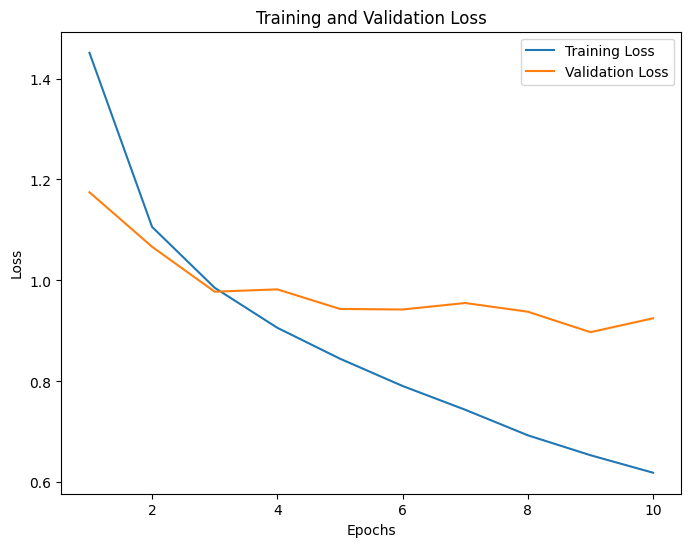

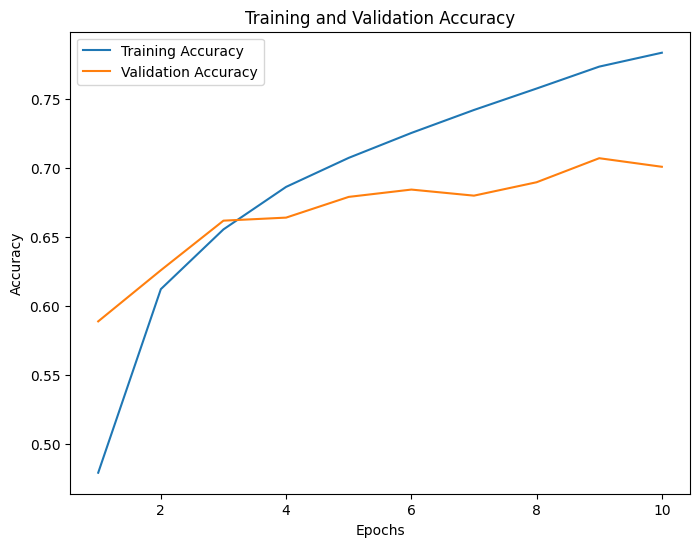

In [172]:
#Plotting Learning curves.
learning_curve(history)